In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# twitter_label_auto.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
test = pd.read_csv('datd_test.csv', delimiter=',', nrows = nRowsRead)
nRow, nCol = test.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 100 rows and 3 columns


In [5]:
test.head(5)

,id,text,label
0,1389164701381128201,"Aku merindukan tempatku yang tenang, tanpa ras...",1
1,1389164409935732737,Gelisah tanpa sebab. Terasa seperti punya kein...,1
2,1389164248991899650,"Sekarang kita masih sama, suka bingung. Suka c...",0
3,1389163530260160512,"aku mula lah gelisah bila dia outstation , kal...",0
4,1389163463134498817,"Kasihan kamu, hidup dalam tekanan dan selalu d...",0


In [6]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# twitter_label_auto.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
train = pd.read_csv('datd_train.csv', delimiter=',', nrows = nRowsRead)
nRow, nCol = train.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 900 rows and 2 columns


In [7]:
train.head(5)

,text,label
0,abis minum kopi perasaan mesti gelisah gatau k...,0
1,sumpah ya dari pagi rasanya gelisah terus,1
2,Catia hari sabtu.Presntasi Statin hari sabtu.....,1
3,tbtb gelisah 🤕,0
4,Memasuki jam jam rawan... Seliweran mulu di ga...,0


## Emoji Cleaning

In [8]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"# flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

### Cleaning test

In [13]:
vocab_size = 4000
embedding_dim = 16
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

import re
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
test_corpus = []
#http_pattern = "^(https?://)?/i"
for i in test['text']:
    data = i
    data = re.sub("https://t.co/\S*","",data)
    data = re.sub("\n","",data)
    data = re.sub("[0-9]","",data)
    data = deEmojify(data)
    #data = data.replace(http_pattern, "")
    test_corpus.append(data.lower())
    
len(test_corpus)

100

In [14]:
test_corpus[1]

'gelisah tanpa sebab. terasa seperti punya keinginan melakukan sesuatu namun terhalang oleh sesuatu.'

### Cleaning + tokenizing Train

In [17]:


import re
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
train_corpus = []
#http_pattern = "^(https?://)?/i"
for i in train['text']:
    data = i
    data = re.sub("https://t.co/\S*","",data)
    data = re.sub("\n","",data)
    data = re.sub("[0-9]","",data)
    data = deEmojify(data)
    #data = data.replace(http_pattern, "")
    train_corpus.append(data.lower())
    
len(train_corpus)
train_corpus[1]

'sumpah ya dari pagi rasanya gelisah terus'

In [18]:
tokenizer.fit_on_texts(train_corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'<OOV>': 1, 'gelisah': 2, 'cemas': 3, 'yang': 4, 'dan': 5, 'aku': 6, 'di': 7, 'ada': 8, 'yg': 9, 'ga': 10, 'ini': 11, 'akan': 12, 'ya': 13, 'tidak': 14, 'hati': 15, 'itu': 16, 'apa': 17, 'orang': 18, 'rasa': 19, 'tapi': 20, 'tak': 21, 'aja': 22, 'gak': 23, 'kalo': 24, 'jadi': 25, 'gue': 26, 'lagi': 27, 'kita': 28, 'hari': 29, 'hal': 30, 'bisa': 31, 'kamu': 32, 'kenapa': 33, 'sendiri': 34, 'takut': 35, 'karena': 36, 'tenang': 37, 'bgt': 38, 'dengan': 39, 'untuk': 40, 'sama': 41, 'banget': 42, 'kau': 43, 'mau': 44, 'udah': 45, 'harap': 46, 'pada': 47, 'resah': 48, 'ke': 49, 'jangan': 50, 'sudah': 51, 'dari': 52, 'banyak': 53, 'allah': 54, 'tau': 55, 'diri': 56, 'tidur': 57, 'dia': 58, 'nya': 59, 'hanya': 60, 'menjadi': 61, 'rasanya': 62, 'buat': 63, 'pernah': 64, 'selalu': 65, 'juga': 66, 'bila': 67, 'terus': 68, 'harus': 69, 'semua': 70, 'sedih': 71, 'paling': 72, 'masa': 73, 'berlebihan': 74, 'sih': 75, 'tuhan': 76, 'bikin': 77, 'pasti': 78, 'lain': 79, 'dalam': 80, 'marah': 81, 'tiba

In [19]:
test_sequences = []
for line in test_corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    test_sequences.append(token_list)
    
train_input_sequences = []
for line in train_corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    train_input_sequences.append(token_list)

### Hasil Tokenizing

In [20]:
print(train_input_sequences[1])
print(test_sequences[1])

[229, 13, 52, 179, 62, 2, 68]
[2, 94, 112, 262, 150, 271, 1064, 559, 162, 583, 1, 242, 162]


### Bagi Test Set dan Train Set

In [21]:
max_length = max([len(x) for x in train_input_sequences])
# padding sequences 
max_sequence_len = max([len(x) for x in train_input_sequences])
train_input_sequences = np.array(pad_sequences(train_input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
X_train = train_input_sequences
y_train = np.array(train['label'])

In [22]:
print(len(X_train[0]))
print(len(X_train))
print(len(y_train))

58
900
900


In [23]:
# padding sequences 
max_sequence_len = max([len(x) for x in train_input_sequences])
test_sequences = np.array(pad_sequences(test_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
X_test = test_sequences
y_test = np.array(test['label'])
print(len(X_test[0]))
print(len(X_test))
print(len(y_test))

58
100
100


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM

In [25]:
max_length

58

In [27]:
embedding_vector_length = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=max_length))
model.add(LSTM(58))
model.add(Dense(30, activation='relu'))
model.add(Dense(24, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 58, 32)            128000    
_________________________________________________________________
lstm (LSTM)                  (None, 58)                21112     
_________________________________________________________________
dense (Dense)                (None, 30)                1770      
_________________________________________________________________
dense_1 (Dense)              (None, 24)                744       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25        
Total params: 151,651
Trainable params: 151,651
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
from keras.callbacks import ModelCheckpoint

cp_callback = tf.keras.callbacks.ModelCheckpoint(save_weights_only=True,
                                                 verbose=1)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=50,callbacks=[cp_callback])

Epoch 1/50
18/18 [==============================] - 21s 54ms/step - loss: 0.9904 - accuracy: 0.4165 - val_loss: 0.7826 - val_accuracy: 0.3200


INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


Epoch 2/50
18/18 [==============================] - 0s 14ms/step - loss: 0.6946 - accuracy: 0.5356 - val_loss: 0.6352 - val_accuracy: 0.6800


INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


Epoch 3/50
18/18 [==============================] - 0s 14ms/step - loss: 0.6856 - accuracy: 0.5711 - val_loss: 0.6575 - val_accuracy: 0.6800
Epoch 4/50
18/18 [==============================] - 0s 14ms/step - loss: 0.6792 - accuracy: 0.5821 - val_loss: 0.6431 - val_accuracy: 0.6800
Epoch 5/50
18/18 [==============================] - 0s 14ms/step - loss: 0.6750 - accuracy: 0.5890 - val_loss: 0.6486 - val_accuracy: 0.6800
Epoch 6/50
18/18 [==============================] - 0s 14ms/step - loss: 0.6696 - accuracy: 0.5945 - val_loss: 0.6469 - val_accuracy: 0.6800
Epoch 7/50
18/18 [==============================] - 0s 14ms/step - loss: 0.6656 - accuracy: 0.5840 - val_loss: 0.6474 - val_accuracy: 0.6800
Epoch 8/50
18/18 [==============================] - 0s 14ms/step - loss: 0.6490 - accuracy: 0.5923 - val_loss: 0.6545 - val_accuracy: 0.6800
Epoch 9/50
18/18 [==============================] - 0s 14ms/step - loss: 0.6022 - accuracy: 0.7539 - val_loss: 0.5985 - val_accuracy: 0.6800
Epoch 10/50
1

INFO:tensorflow:Assets written to: model-019.model\assets


INFO:tensorflow:Assets written to: model-019.model\assets


Epoch 20/50
18/18 [==============================] - 0s 14ms/step - loss: 0.1359 - accuracy: 0.9555 - val_loss: 0.8533 - val_accuracy: 0.6700
Epoch 21/50
18/18 [==============================] - 0s 15ms/step - loss: 0.1255 - accuracy: 0.9567 - val_loss: 1.0203 - val_accuracy: 0.6000
Epoch 22/50
18/18 [==============================] - 0s 15ms/step - loss: 0.1087 - accuracy: 0.9648 - val_loss: 1.2535 - val_accuracy: 0.5900
Epoch 23/50
18/18 [==============================] - 0s 15ms/step - loss: 0.1140 - accuracy: 0.9584 - val_loss: 0.9479 - val_accuracy: 0.6300
Epoch 24/50
18/18 [==============================] - 0s 14ms/step - loss: 0.1076 - accuracy: 0.9627 - val_loss: 1.0108 - val_accuracy: 0.6300
Epoch 25/50
18/18 [==============================] - 0s 14ms/step - loss: 0.0946 - accuracy: 0.9728 - val_loss: 1.0507 - val_accuracy: 0.6400
Epoch 26/50
18/18 [==============================] - 0s 14ms/step - loss: 0.0963 - accuracy: 0.9694 - val_loss: 0.9593 - val_accuracy: 0.6200
Epoch 

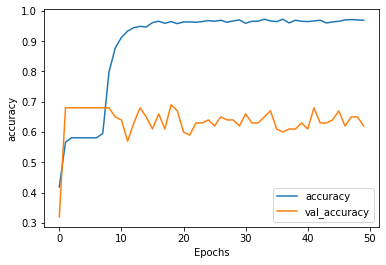

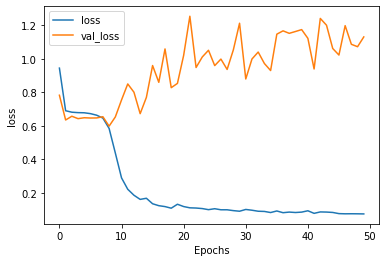

In [33]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

## Model 2

In [44]:
embedding_vector_length = 100
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_vector_length, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(53)),
    #53 karena max words nya ada 53
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(24, activation='sigmoid'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(24, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 58, 100)           400000    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 106)               65296     
_________________________________________________________________
dense_33 (Dense)             (None, 24)                2568      
_________________________________________________________________
dense_34 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_35 (Dense)             (None, 24)                600       
_________________________________________________________________
dropout_6 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 24)               

In [48]:
from keras.callbacks import ModelCheckpoint

checkpoint_path = "training_1_weights/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=50,callbacks=[cp_callback])

Epoch 1/50
18/18 [==============================] - 0s 27ms/step - loss: 0.0683 - accuracy: 0.9700 - val_loss: 0.8836 - val_accuracy: 0.7100

Epoch 00001: saving model to training_1\cp.ckpt
Epoch 2/50
18/18 [==============================] - 0s 25ms/step - loss: 0.0693 - accuracy: 0.9656 - val_loss: 0.8419 - val_accuracy: 0.7400

Epoch 00002: saving model to training_1\cp.ckpt
Epoch 3/50
18/18 [==============================] - 0s 26ms/step - loss: 0.0720 - accuracy: 0.9711 - val_loss: 0.8473 - val_accuracy: 0.7300

Epoch 00003: saving model to training_1\cp.ckpt
Epoch 4/50
18/18 [==============================] - 0s 25ms/step - loss: 0.0693 - accuracy: 0.9644 - val_loss: 0.8707 - val_accuracy: 0.7300

Epoch 00004: saving model to training_1\cp.ckpt
Epoch 5/50
18/18 [==============================] - 0s 25ms/step - loss: 0.0681 - accuracy: 0.9667 - val_loss: 0.7407 - val_accuracy: 0.7600

Epoch 00005: saving model to training_1\cp.ckpt
Epoch 6/50
18/18 [==============================] 

Epoch 44/50
18/18 [==============================] - 0s 24ms/step - loss: 0.0634 - accuracy: 0.9644 - val_loss: 0.9388 - val_accuracy: 0.7600

Epoch 00044: saving model to training_1\cp.ckpt
Epoch 45/50
18/18 [==============================] - 0s 24ms/step - loss: 0.0599 - accuracy: 0.9689 - val_loss: 0.9054 - val_accuracy: 0.7600

Epoch 00045: saving model to training_1\cp.ckpt
Epoch 46/50
18/18 [==============================] - 0s 24ms/step - loss: 0.0585 - accuracy: 0.9722 - val_loss: 0.8725 - val_accuracy: 0.7600

Epoch 00046: saving model to training_1\cp.ckpt
Epoch 47/50
18/18 [==============================] - 0s 25ms/step - loss: 0.0624 - accuracy: 0.9678 - val_loss: 0.9674 - val_accuracy: 0.7600

Epoch 00047: saving model to training_1\cp.ckpt
Epoch 48/50
18/18 [==============================] - 0s 24ms/step - loss: 0.0624 - accuracy: 0.9656 - val_loss: 0.8098 - val_accuracy: 0.7800

Epoch 00048: saving model to training_1\cp.ckpt
Epoch 49/50
18/18 [==========================

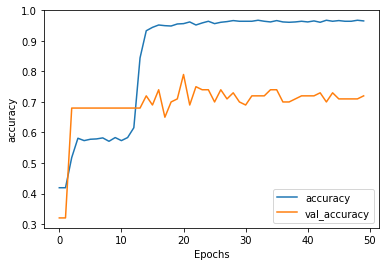

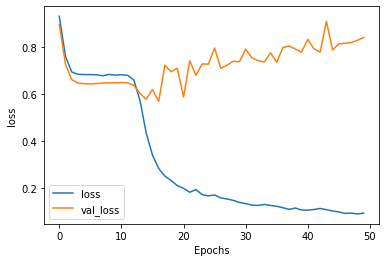

In [45]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')